<a href="https://colab.research.google.com/github/urvisha125/sales-anlyst/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [ ]:
df=pd.read_csv('/content/archive (1).zip')
df.head(2)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
#  Product Popularity: Determine the most and least popular products based on quantity sold

product_popularity = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
print("Most Popular Products:")
print(product_popularity.head())

print("\nLeast Popular Products:")
print(product_popularity.tail())


Most Popular Products:
Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Name: Quantity, dtype: int64

Least Popular Products:
Product line
Food and beverages     952
Sports and travel      920
Home and lifestyle     911
Fashion accessories    902
Health and beauty      854
Name: Quantity, dtype: int64


## 2. Customer Analysis

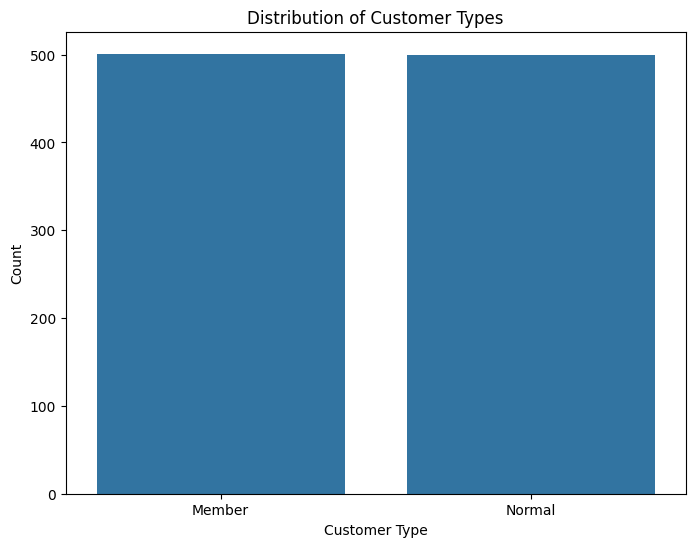

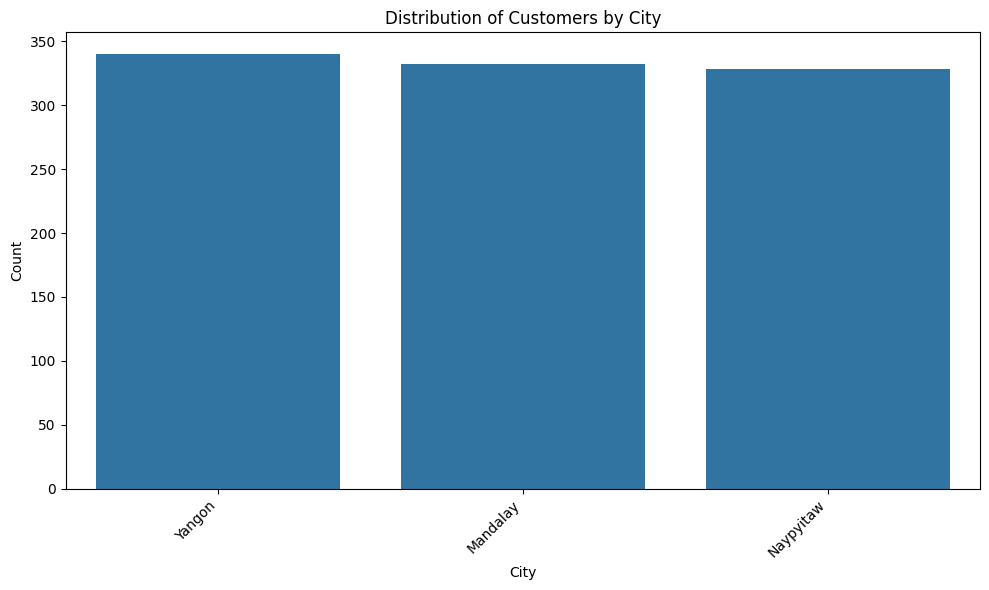

In [ ]:
#  Customer Demographics: Analyze the distribution of customers by type (e.g., new vs. returning), gender, and city.

# Customer type distribution
customer_type_counts = df['Customer type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values)
plt.title('Distribution of Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()



# City distribution
city_counts = df['City'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Distribution of Customers by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


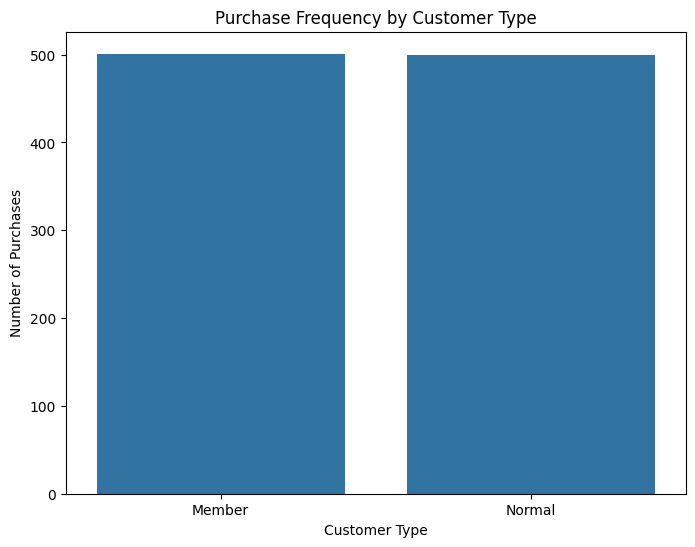

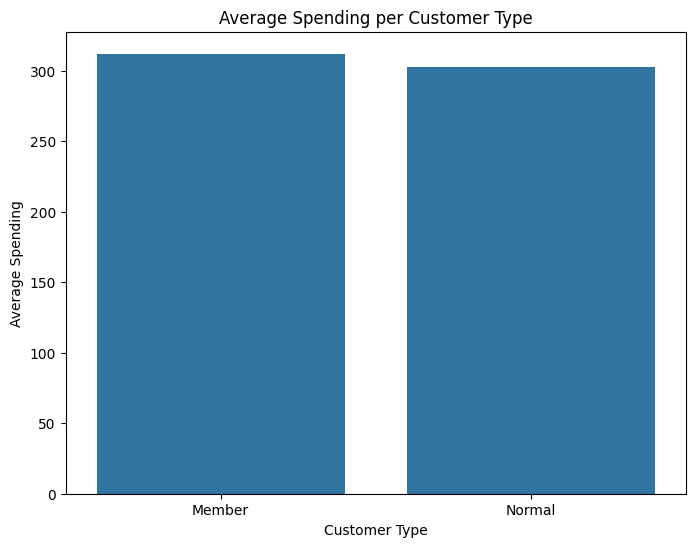

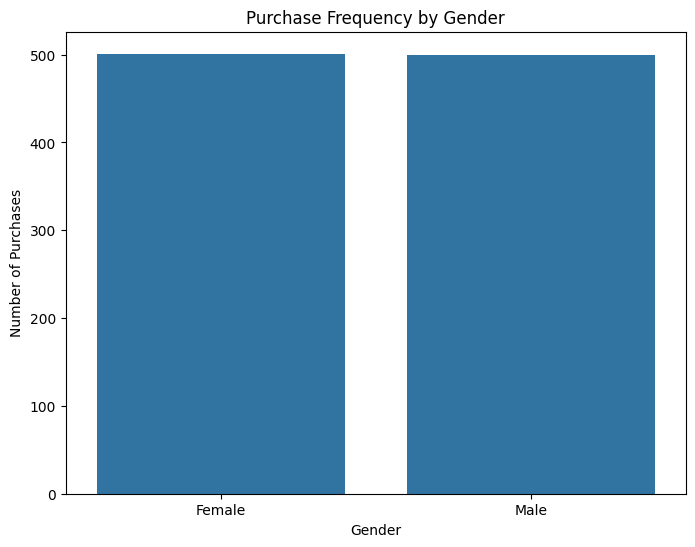

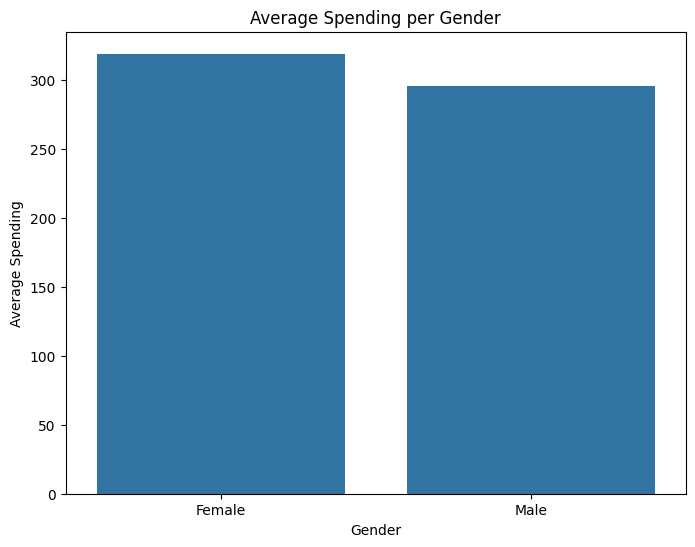

In [ ]:
#  Purchase Patterns: Examine purchase frequency and average spending per customer type and gender.

# Purchase frequency by customer type
purchase_frequency_by_type = df.groupby('Customer type')['Invoice ID'].nunique()
plt.figure(figsize=(8, 6))
sns.barplot(x=purchase_frequency_by_type.index, y=purchase_frequency_by_type.values)
plt.title('Purchase Frequency by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Purchases')
plt.show()

# Average spending per customer type
df['Total'] = df['Quantity'] * df['Unit price']
average_spending_by_type = df.groupby('Customer type')['Total'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_spending_by_type.index, y=average_spending_by_type.values)
plt.title('Average Spending per Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Spending')
plt.show()

# Purchase frequency by gender
purchase_frequency_by_gender = df.groupby('Gender')['Invoice ID'].nunique()
plt.figure(figsize=(8, 6))
sns.barplot(x=purchase_frequency_by_gender.index, y=purchase_frequency_by_gender.values)
plt.title('Purchase Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()

# Average spending per gender
average_spending_by_gender = df.groupby('Gender')['Total'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_spending_by_gender.index, y=average_spending_by_gender.values)
plt.title('Average Spending per Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending')
plt.show()


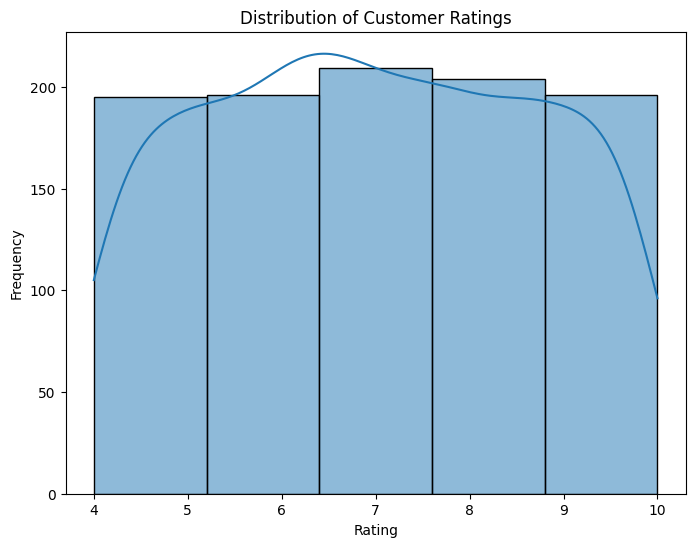

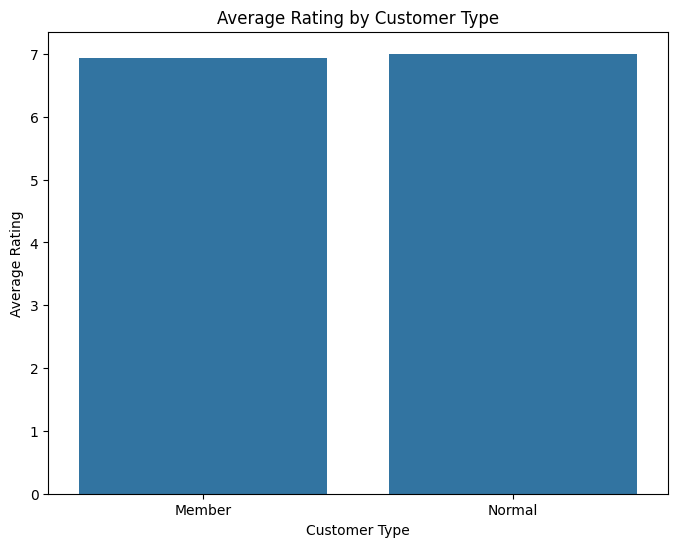

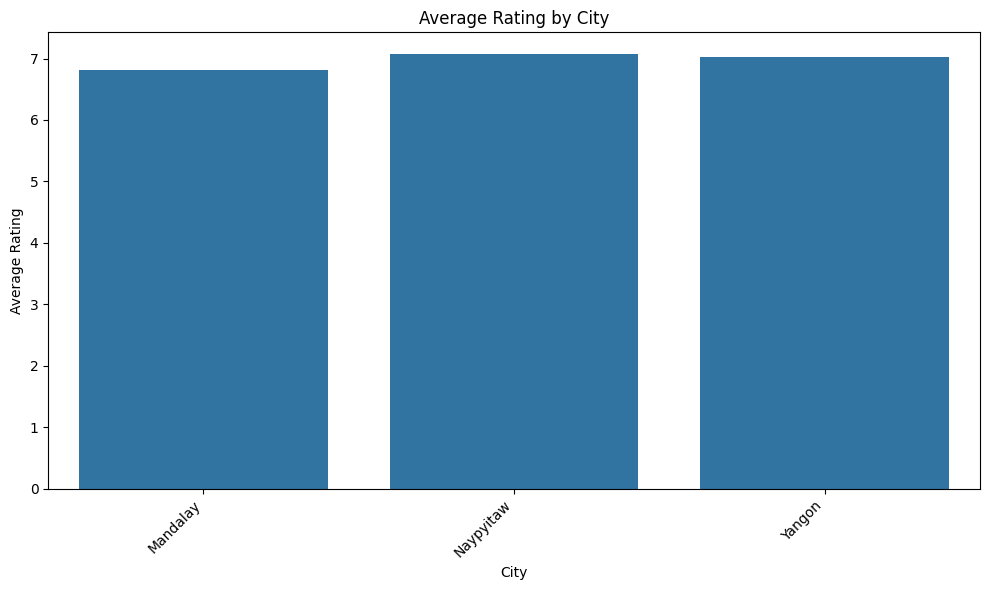

In [ ]:
#  Customer Satisfaction: Analyze customer ratings to identify satisfaction levels and areas for improvement

# Customer Satisfaction Analysis

# Overall rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Average rating by customer type
average_rating_by_type = df.groupby('Customer type')['Rating'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_rating_by_type.index, y=average_rating_by_type.values)
plt.title('Average Rating by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Rating')
plt.show()

# Average rating by city
average_rating_by_city = df.groupby('City')['Rating'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_city.index, y=average_rating_by_city.values)
plt.title('Average Rating by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Further analysis could involve:
# - Correlation between rating and other variables (e.g., total spending, product categories)
# - Text analysis of customer reviews (if available) to identify specific areas for improvement


**1. Sales Analysis**
 Understand the overall sales performance

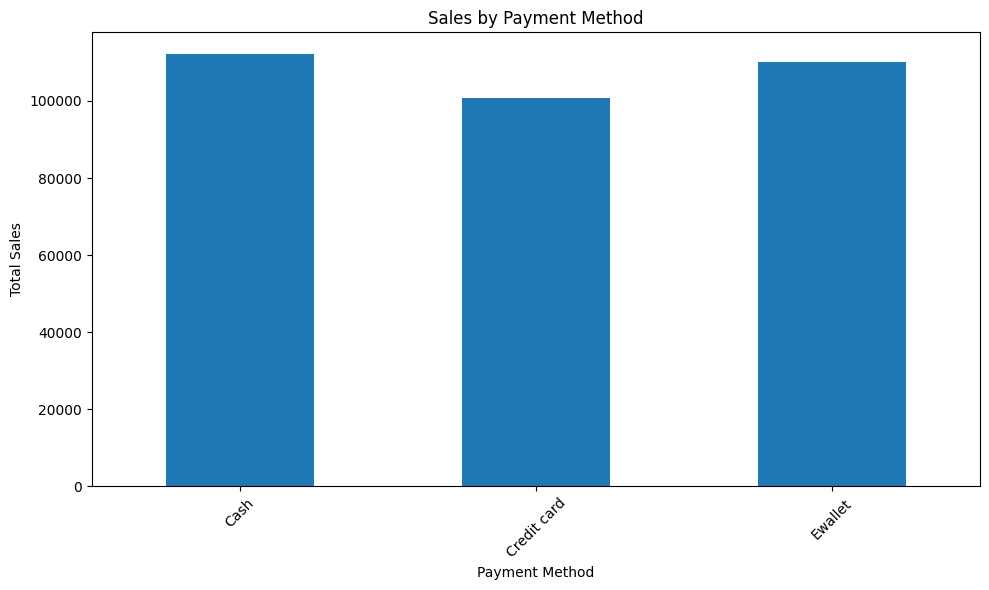

In [ ]:
#  Sales by Payment Method: Examine the distribution of sales across different payment methods

# Group the data by payment method and calculate the total sales for each method
sales_by_payment_method = df.groupby('Payment')['Total'].sum()

# Create a bar plot to visualize the sales distribution
plt.figure(figsize=(10, 6))
sales_by_payment_method.plot(kind='bar')
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


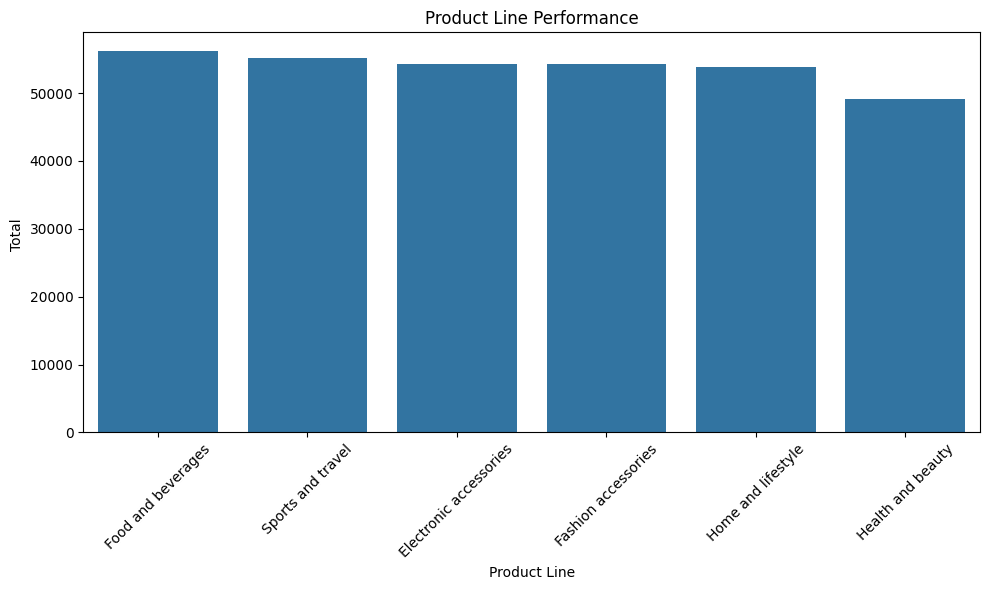

In [ ]:
# Product Line Performance: Identify top-performing product lines

# Group sales by product line and calculate total revenue
product_line_performance = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Print the top performing product lines
print(product_line_performance)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=product_line_performance.index, y=product_line_performance.values)
plt.title('Product Line Performance')
plt.xlabel('Product Line')
plt.ylabel('Total ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


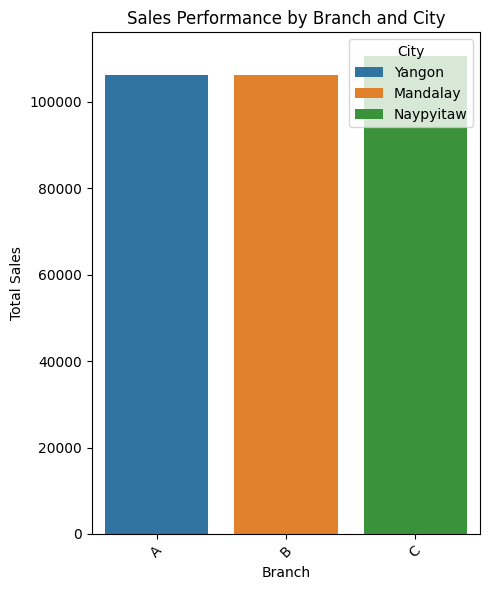

Top Performing Branches:
 Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64

Top Performing Cities:
 City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64


In [ ]:
# Branch and City Performance: Analyze sales performance across different branches and cities

# Group sales by branch and city
branch_city_sales = df.groupby(['Branch', 'City'])['Total'].sum().reset_index()

# Visualize sales performance
plt.figure(figsize=(5, 6))
sns.barplot(x='Branch', y='Total', hue='City', data=branch_city_sales)
plt.title('Sales Performance by Branch and City')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify top performing branches and cities
top_branches = branch_city_sales.groupby('Branch')['Total'].sum().sort_values(ascending=False).head()
top_cities = branch_city_sales.groupby('City')['Total'].sum().sort_values(ascending=False).head()

print("Top Performing Branches:\n", top_branches)
print("\nTop Performing Cities:\n", top_cities)


In [ ]:
 #Calculate the total sales for different time periods (daily, weekly, monthly)

# Extract relevant columns for sales analysis
sales_data = df[['Date', 'Quantity', 'Unit price']]

# Convert 'InvoiceDate' to datetime object
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Set 'Date' as index
sales_data.set_index('Date', inplace=True)

# Calculate daily sales
daily_sales = sales_data.resample('D').sum()

# Calculate weekly sales
weekly_sales = sales_data.resample('w').sum()
# Calculate monthly sales
monthly_sales = sales_data.resample('M').sum()

print("Daily Sales:\n", daily_sales.head())


print("\nWeekly Sales:\n", weekly_sales.head())



print("\nMonthly Sales:\n", monthly_sales.head())





Daily Sales:
             Quantity  Unit price
Date                            
2019-01-01        81      659.95
2019-01-02        48      357.08
2019-01-03        37      475.66
2019-01-04        32      310.46
2019-01-05        55      739.64

Weekly Sales:
             Quantity  Unit price
Date                            
2019-01-06       305     3078.95
2019-01-13       431     3928.18
2019-01-20       461     4804.48
2019-01-27       489     5359.87
2019-02-03       484     4493.68

Monthly Sales:
             Quantity  Unit price
Date                            
2019-01-31      1965    19753.89
2019-02-28      1654    17159.52
2019-03-31      1891    18758.72


<ipython-input-18-6e884fe1673a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Date'] = pd.to_datetime(sales_data['Date'])


In [ ]:
# prompt: conect to drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!jupyter nbconvert --to pdf /content/drive/MyDrive/sales.ipynb

from google.colab import files
files.download('/content/drive/MyDrive/sales.pdf')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/sales.ipynb to pdf
[NbConvertApp] Support files will be in sales_files/
[NbConvertApp] Making directory ./sales_files
[NbConvertApp] Writing 28814 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 58861 bytes to /content/drive/MyDrive/sales.pd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>